In [2]:
import statsmodels.api as sm #for OLS regression
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #for heatmap plotting
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns #for heatmap plotting
from statsmodels.iolib.summary2 import summary_col #to summarize multiple regressions in one table
from datetime import date
from dateutil.relativedelta import relativedelta
import math
from scipy import stats

In [3]:
#pf_size = pd.read_csv('C:/Users/yz2991/Desktop/Portfolios_Formed_on_ME_daily.csv')
#ff5 = pd.read_csv('C:/Users/yz2991/Desktop/F-F_Research_Data_5_Factors_2x3_daily.csv')
pf_size = pd.read_csv('data/Portfolios_Formed_on_ME_daily.csv')
ff5 = pd.read_csv('data/F-F_Research_Data_5_Factors_2x3_daily.csv')

In [4]:
pf_size.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [5]:
pf_size_excess=(pf_size.iloc[:,1:pf_size.shape[1]]).sub(ff5.RF,axis=0)
print(pf_size_excess.head())

      <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
0 -100.002 -0.592  -0.552 -0.682 -0.622 -0.702 -0.482 -0.572 -0.692 -0.652   
1 -100.002  0.428   0.578  0.838  0.488  0.608  0.528  0.708  0.838  0.368   
2 -100.002  0.538   0.568  0.638  0.508  0.558  0.608  0.608  0.638  0.398   
3 -100.002  0.318   0.328  0.418  0.398  0.278  0.358  0.278  0.428  0.348   
4 -100.002 -0.442  -0.542 -0.642 -0.362 -0.752 -0.632 -0.372 -0.672 -0.482   

   2-Dec  3-Dec  4-Dec  5-Dec  6-Dec  7-Dec  8-Dec  9-Dec  Hi 10  
0 -0.592 -0.552 -0.822 -0.562 -0.422 -0.532 -0.602 -0.702 -0.692  
1  0.608  0.318  0.848  0.488  0.548  0.538  0.808  0.638  0.878  
2  0.618  0.598  0.528  0.388  0.768  0.548  0.648  0.618  0.638  
3  0.468  0.168  0.378  0.398  0.328  0.278  0.278  0.298  0.458  
4 -0.232 -0.592 -0.872 -0.652 -0.612 -0.312 -0.402 -0.482 -0.712  


In [6]:
ff5['YYMM'] = pd.to_datetime(ff5['YYMM'],yearfirst=True, format='%Y%m%d')
pf_size_excess['YYMM'] = pd.to_datetime(pf_size['YYMM'],yearfirst=True, format='%Y%m%d')
print(pf_size_excess.head())

      <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
0 -100.002 -0.592  -0.552 -0.682 -0.622 -0.702 -0.482 -0.572 -0.692 -0.652   
1 -100.002  0.428   0.578  0.838  0.488  0.608  0.528  0.708  0.838  0.368   
2 -100.002  0.538   0.568  0.638  0.508  0.558  0.608  0.608  0.638  0.398   
3 -100.002  0.318   0.328  0.418  0.398  0.278  0.358  0.278  0.428  0.348   
4 -100.002 -0.442  -0.542 -0.642 -0.362 -0.752 -0.632 -0.372 -0.672 -0.482   

   2-Dec  3-Dec  4-Dec  5-Dec  6-Dec  7-Dec  8-Dec  9-Dec  Hi 10       YYMM  
0 -0.592 -0.552 -0.822 -0.562 -0.422 -0.532 -0.602 -0.702 -0.692 1963-07-01  
1  0.608  0.318  0.848  0.488  0.548  0.538  0.808  0.638  0.878 1963-07-02  
2  0.618  0.598  0.528  0.388  0.768  0.548  0.648  0.618  0.638 1963-07-03  
3  0.468  0.168  0.378  0.398  0.328  0.278  0.278  0.298  0.458 1963-07-05  
4 -0.232 -0.592 -0.872 -0.652 -0.612 -0.312 -0.402 -0.482 -0.712 1963-07-08  


In [7]:
print(ff5.head())

        YYMM  Mkt-RF   SMB   HML   RMW   CMA     RF
0 1963-07-01   -0.67  0.00 -0.32 -0.01  0.15  0.012
1 1963-07-02    0.79 -0.27  0.27 -0.07 -0.19  0.012
2 1963-07-03    0.63 -0.17 -0.09  0.17 -0.33  0.012
3 1963-07-05    0.40  0.08 -0.28  0.08 -0.33  0.012
4 1963-07-08   -0.63  0.04 -0.18 -0.29  0.13  0.012


In [8]:
ff5.index = ff5['YYMM']
pf_size_excess.index = pf_size_excess['YYMM']
ff5 = ff5.drop('YYMM', axis = 1)
ff5 = ff5.drop('RF', axis = 1)
# pf_size_excess = pf_size_excess.loc[:,['Lo 30','Med 40','Hi 30']]

In [9]:
start = ff5.index[0]
end = ff5.index[ff5.shape[0]-1]
n_day = end - start
print(n_day.days)
print(ff5.shape[0])
#because there are weekends and public holidays, we use every 126 records as a proxy of every 6-month window\n",
#There are in total 14075 records, thus will have 14075 - 126 + 1 =  13950 windows\n",
window = 126
n_window = ff5.shape[0] - 126 + 1
print(n_window)

20423
14075
13950


In [10]:
#To run OLS on a 6-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 13950 models are for the portfolio Lo 30,\n",
#the next 13950 models are for the portfolio Med 40\n",
pf_3 = pf_size_excess.loc[:,['Lo 30','Med 40','Hi 30']]
models_3_pf = []
for i in range (3):
    for m in range(n_window):
        
        t0 = ff5.index[0+m]
        if ff5.index[0+m+window-1] < end:
            t1 = ff5.index[0+m+window-1]
        else:
            t1 = end
        
        x = ff5[t0:t1]
        x = sm.add_constant(x)
        y = pf_3[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_3_pf.append(reg.fit())
    

/home/whan/miniconda3/envs/eqai/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [11]:
print(models_3_pf[0].summary())

                            OLS Regression Results                            
Dep. Variable:                  Lo 30   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     701.9
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           4.98e-87
Time:                        12:17:44   Log-Likelihood:                 113.16
No. Observations:                 126   AIC:                            -214.3
Df Residuals:                     120   BIC:                            -197.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0204      0.009     -2.222      0.0

In [12]:
print(window)
window_nm = []
for i in range(n_window):
    nm = ff5.index[i+int(window/2)]
    window_nm.append(nm)
print(len(window_nm))
portfolio_nm_3 = pf_size_excess.columns[1:4]
print(portfolio_nm_3)

126
13950
Index(['Lo 30', 'Med 40', 'Hi 30'], dtype='object')


In [13]:
Rsquare_3_pf = {}
for i in range(3):
    x = []
    for n in range(n_window):  
        x.append(models_3_pf[i*n_window +n].rsquared) 
    Rsquare_3_pf["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

In [14]:
pf_5 = pf_size_excess.loc[:,['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
models_5_pf = []
for i in range (5):
    for m in range(n_window):
        
        t0 = ff5.index[0+m]
        if ff5.index[0+m+window-1] < end:
            t1 = ff5.index[0+m+window-1]
        else:
            t1 = end
        
        x = ff5[t0:t1]
        x = sm.add_constant(x)
        y = pf_5[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_5_pf.append(reg.fit())
    

In [15]:
Rsquare_5_pf = {}
for i in range(5):
    x = []
    for n in range(n_window):  
        x.append(models_5_pf[i*n_window +n].rsquared) 
    Rsquare_5_pf["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

In [16]:
pf_10 = pf_size_excess.loc[:,['Lo 10', '2-Dec', '3-Dec','4-Dec', '5-Dec', '6-Dec', '7-Dec', '8-Dec','9-Dec', 'Hi 10']]
models_10_pf = []
for i in range (10):
    for m in range(n_window):
        
        t0 = ff5.index[0+m]
        if ff5.index[0+m+window-1] < end:
            t1 = ff5.index[0+m+window-1]
        else:
            t1 = end
        
        x = ff5[t0:t1]
        x = sm.add_constant(x)
        y = pf_10[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_10_pf.append(reg.fit())

In [17]:
Rsquare_10_pf = {}
for i in range(10):
    x = []
    for n in range(n_window):  
        x.append(models_10_pf[i*n_window +n].rsquared) 
    Rsquare_10_pf["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

/home/whan/miniconda3/envs/eqai/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


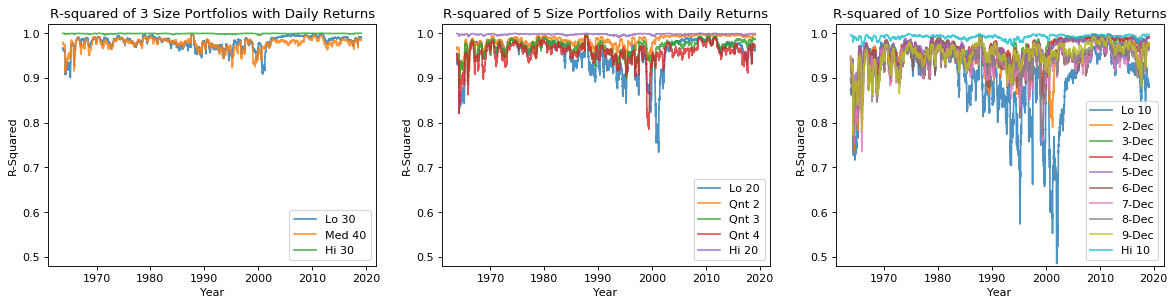

In [18]:
fig=plt.figure(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(Rsquare_3_pf['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 3 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(1, 3, 2)
plt.plot(Rsquare_5_pf['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(1, 3, 3)
plt.plot(Rsquare_10_pf['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.show()


In [ ]:
#pf_size_mm = pd.read_csv('C:/Users/yz2991/Desktop/Portfolios_Formed_on_ME_monthly.csv')
#ff5_mm = pd.read_csv('C:/Users/yz2991/Desktop/F-F_Research_Data_5_Factors_2x3_monthly.csv')

pf_size_mm = pd.read_csv('data/Portfolios_Formed_on_ME_monthly.csv')
ff5_mm = pd.read_csv('data/F-F_Research_Data_5_Factors_2x3_monthly.csv')

In [21]:
print(pf_size_mm.tail())

NameError: name 'pf_size_mm' is not defined

In [22]:
pf_size_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

NameError: name 'pf_size_mm' is not defined

In [23]:
pf_size_excess_mm=(pf_size_mm.iloc[:,1:pf_size_mm.shape[1]]).sub(ff5_mm.RF,axis=0)

NameError: name 'pf_size_mm' is not defined

In [24]:
ff5_mm['YYMM'] = pd.to_datetime(ff5_mm['YYMM'],yearfirst=True, format='%Y%m')
pf_size_excess_mm['YYMM'] = pd.to_datetime(pf_size_mm['YYMM'],yearfirst=True, format='%Y%m')

NameError: name 'ff5_mm' is not defined

In [25]:
print(pf_size_excess_mm.tail())

NameError: name 'pf_size_excess_mm' is not defined

In [ ]:
ff5_mm.index = ff5_mm['YYMM']
pf_size_excess_mm.index = pf_size_excess_mm['YYMM']
ff5_mm = ff5_mm.drop('YYMM', axis = 1)
ff5_mm = ff5_mm.drop('RF', axis = 1)

In [ ]:
#use 10 year window (number of obs will be close to daily models with half-year window)
start_mm = ff5_mm.index[0]
end_mm = ff5_mm.index[ff5_mm.shape[0]-1]
n_month = end_mm - start_mm
print(ff5_mm.shape[0])
window_mm = 120
n_window_mm = ff5_mm.shape[0] - window_mm + 1
print(n_window_mm)
print(end_mm)

In [ ]:
print(window_mm)
window_nm_month = []
for i in range(n_window_mm):
    nm = ff5_mm.index[i+int(window_mm/2)]
    window_nm_month.append(nm)
print(len(window_nm_month))
portfolio_nm_3 = pf_size_excess.columns[1:4]
print(portfolio_nm_3)

In [ ]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_3_mm = pf_size_excess_mm.loc[:,['Lo 30','Med 40','Hi 30']]
models_3_pf_mm = []
for i in range (3):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_3_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_3_pf_mm.append(reg.fit())
    

In [ ]:
Rsquare_3_pf_mm = {}
for i in range(3):
    x = []
    for n in range(n_window_mm):  
        x.append(models_3_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_3_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [ ]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_5_mm = pf_size_excess_mm.loc[:,['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
models_5_pf_mm = []
for i in range (5):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_5_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_5_pf_mm.append(reg.fit())

In [ ]:
Rsquare_5_pf_mm = {}
for i in range(5):
    x = []
    for n in range(n_window_mm):  
        x.append(models_5_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_5_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [ ]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_10_mm = pf_size_excess_mm.loc[:,['Lo 10', '2-Dec', '3-Dec','4-Dec', '5-Dec', '6-Dec', '7-Dec', '8-Dec','9-Dec', 'Hi 10']]
models_10_pf_mm = []
for i in range (10):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_10_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_10_pf_mm.append(reg.fit())

In [ ]:
Rsquare_10_pf_mm = {}
for i in range(10):
    x = []
    for n in range(n_window_mm):  
        x.append(models_10_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_10_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [ ]:
fig=plt.figure(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(Rsquare_3_pf_mm['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.xlim(["1963","2022"])
plt.title('R-squared of 3 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.plot(Rsquare_5_pf_mm['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.plot(Rsquare_10_pf_mm['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.show()

In [ ]:
fig = plt.figure(figsize=(130, 80), dpi= 80, facecolor='w', edgecolor='k')

plt.subplots(2, 3, sharex=True, sharey=True)

plt.subplot(2, 3, 4)
plt.plot(Rsquare_3_pf['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 3 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(2, 3, 5)
plt.plot(Rsquare_5_pf['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(2, 3, 6)
plt.plot(Rsquare_10_pf['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(2, 3, 1)
plt.plot(Rsquare_3_pf_mm['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.xlim(["1963","2022"])
plt.title('R-squared of 3 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(2, 3, 2)
plt.plot(Rsquare_5_pf_mm['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(2, 3, 3)
plt.plot(Rsquare_10_pf_mm['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.show()

In [ ]:
corr = ff5_mm.corr()

In [ ]:
print(corr)

In [ ]:
corr.iloc[1][4]

Rsquare_5_pf_mm = {}
for i in range(5):
    x = []
    for n in range(n_window_mm):  
        x.append(models_5_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_5_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [ ]:
correlation = []
for m in range(n_window_mm):
    t0 = ff5_mm.index[0+m]
    if ff5_mm.index[0+m+window_mm-1] < end_mm:
        t1 = ff5_mm.index[0+m+window_mm-1]
    else:
        t1 = end_mm
    correlation.append(ff5_mm[t0:t1].corr())
        

In [ ]:
print(correlation[1])
correlation[0].iloc[4][1]

In [ ]:
Mrk_SMB = []
Mrk_HML = []
Mrk_RMW = []
Mrk_CMA = []
SMB_HML = []
SMB_RMW = []
SMB_CMA = []
HML_RMW = []
HML_CMA = []
RMW_CMA = []
for i in range(len(correlation)):
    Mrk_SMB.append(correlation[i].iloc[0][1])
    Mrk_HML.append(correlation[i].iloc[0][2])
    Mrk_RMW.append(correlation[i].iloc[0][3])
    Mrk_CMA.append(correlation[i].iloc[0][4])
    SMB_HML.append(correlation[i].iloc[1][2])
    SMB_RMW.append(correlation[i].iloc[1][3])
    SMB_CMA.append(correlation[i].iloc[1][4])
    HML_RMW.append(correlation[i].iloc[2][3])
    HML_CMA.append(correlation[i].iloc[2][4])
    RMW_CMA.append(correlation[i].iloc[3][4])
    
Mrk_SMB_Corr = pd.Series(Mrk_SMB,index = window_nm_month)
Mrk_HML_Corr = pd.Series(Mrk_HML,index = window_nm_month)  
Mrk_RMW_Corr = pd.Series(Mrk_RMW,index = window_nm_month)  
Mrk_CMA_Corr = pd.Series(Mrk_CMA,index = window_nm_month)  
SMB_HML_Corr = pd.Series(SMB_HML,index = window_nm_month)  
SMB_RMW_Corr = pd.Series(SMB_RMW,index = window_nm_month)  
SMB_CMA_Corr = pd.Series(SMB_CMA,index = window_nm_month)  
HML_RMW_Corr = pd.Series(HML_RMW,index = window_nm_month)  
HML_CMA_Corr = pd.Series(HML_CMA,index = window_nm_month)  
RMW_CMA_Corr = pd.Series(RMW_CMA,index = window_nm_month)  

In [ ]:
fig = plt.figure(figsize=(130, 80), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots(4, 4, sharex=True, sharey=True)

plt.subplot(4, 4, 1)
plt.plot(Mrk_SMB_Corr)
plt.xlabel('Mrk-Rf')
plt.ylabel('SMB')

plt.subplot(4, 4, 2)
plt.plot(Mrk_HML_Corr)
plt.xlabel('Mrk-Rf')
plt.ylabel('HML')

plt.subplot(4, 4, 3)
plt.plot(Mrk_RMW_Corr)
plt.xlabel('Mrk-Rf')
plt.ylabel('RMW')

plt.subplot(4, 4, 4)
plt.plot(Mrk_CMA_Corr)
plt.xlabel('Mrk-Rf')
plt.ylabel('CMA')

plt.subplot(4, 4, 6)
plt.plot(SMB_HML_Corr)
plt.xlabel('SMB')
plt.ylabel('HML')

plt.subplot(4, 4, 7)
plt.plot(SMB_RMW_Corr)
plt.xlabel('SMB')
plt.ylabel('RMW')

plt.subplot(4, 4, 8)
plt.plot(SMB_CMA_Corr)
plt.xlabel('SMB')
plt.ylabel('CMA')

plt.subplot(4, 4, 11)
plt.plot(HML_RMW_Corr)
plt.xlabel('HML')
plt.ylabel('RMW')

plt.subplot(4, 4, 12)
plt.plot(HML_CMA_Corr)
plt.xlabel('HML')
plt.ylabel('CMA')

plt.subplot(4, 4, 16)
plt.plot(RMW_CMA_Corr)
plt.xlabel('RMW')
plt.ylabel('CMA')

plt.show()